# Study of Reiners-Christensen model : comparison with Lynch, 2018

In [1]:
#%matplotlib qt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from star import Star
from planet import Planet
from dynamo_region import DynamoRegion
from magnetic_moment import MagneticMoment
from stellar_wind import StellarWind
from emission import Emission

## Test avec les différentes tables

In [3]:
MJ = 1.8986e27 #kg

names=[str(i) for i in range(10000)]
masses=np.logspace(np.log10(0.0006), np.log10(20), 10000) ; radius=[1.] * 10000
orbital_period=[np.nan] * 10000 ; mass_sini = [np.nan] * 10000
smaxis = [5.2] * 10000  ; ecc = [0.0] * 10000
stardist = [145.0] * 10000 ; star_age = [4.6] * 10000
star_mass = [1.0] * 10000 ; star_radius = [1.0] * 10000
detection_type = ['rien'] * 10000
coeff_rc = 1 - (0.17/masses)

In [ ]:
data_test=pd.DataFrame({ 'pl_name' : names, 'mass' : masses, 'radius' : radius, 'orbital_period' : orbital_period,
    'semi_major_axis' : smaxis, 'eccentricity' : ecc, 'star_distance' : stardist, 'star_mass' : star_mass,
    'star_radius' : star_radius, 'mass_sini' : mass_sini, 'star_age' : star_age, 'detection_type' : detection_type})

data_test.to_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/data_M_VS_Mmag_R1.csv', sep=",")

 - Burrows et al, 1997 : limite pas en dessous de 1MJ

In [4]:
data_Burrows = pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Programmes/M_VS_Mmag_RC_Burrows.csv', delimiter=';', index_col=0)

In [5]:
mass_to_plot=data_Burrows['planet_mass']
Lum_Burrows=data_Burrows['planet_luminosity']
Mmag_Burrows=data_Burrows['magnetic_moment']

- Baraffe et al, 2008 : limites âge s'arrête à 7Gyr

In [6]:
#data_Baraffe_irrad = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/M_VS_Mmag_RC_Baraffe_irrad.csv', delimiter=';', index_col=0)
data_Baraffe_noirrad = pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Programmes/M_VS_Mmag_RC_Baraffe_noirrad.csv', delimiter=';', index_col=0)

In [7]:
barraffe_noirrad=pd.read_csv(r"Baraffe_no_irrad.csv", delimiter=";")
#barraffe_irrad=pd.read_csv(r"Baraffe_irrad.csv", delimiter=";")
MJ = 1.8986e27
ME = 6e24
age_dict = [
    "t=0.01_log(L/Ls)",
    "t=0.05_log(L/Ls)",
    "t=0.10_log(L/Ls)",
    "t=0.50_log(L/Ls)",
    "t=1.00_log(L/Ls)",
    "t=3.00_log(L/Ls)",
    "t=5.00_log(L/Ls)",
    "t=7.00_log(L/Ls)",
    ]

In [8]:
burrows = pd.read_csv(r"Burrows.csv", delimiter=";")
mass_dict = ["M=1MJ_", "M=5MJ_", "M=10MJ_", "M=20MJ_"]
luminosities = [
    10 ** np.interp(
        np.log10(4.6),
        burrows[mass + "log(t) (Gyr)"],
        burrows[mass + "log(L/Ls)"],
    )
    for mass in mass_dict
]

In [9]:
Lum_Baraffe_noirrad=data_Baraffe_noirrad['planet_luminosity']
Mmag_Baraffe_noirrad=data_Baraffe_noirrad['magnetic_moment']

In [ ]:
Lum_Baraffe_irrad=data_Baraffe_irrad['planet_luminosity']
Mmag_Baraffe_irrad=data_Baraffe_irrad['magnetic_moment']

In [10]:
color_dict = ['tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray', 'tab:olive','tab:cyan']

In [ ]:
fig, ax1 = plt.subplots()

#ax1.plot(mass_to_plot,Lum_Burrows,color='tab:blue',label='Burrows')
#ax1.plot([1.0, 5.0, 10.0, 20.0],luminosities,linestyle='dotted', marker='o', label='Table Burrows')
ax1.set_xlabel('Mass in [M$_J$]')
ax1.set_ylabel('Luminosity in [L$_{sun}$]')
ax1.set_yscale('log')
ax1.set_xscale("log")
ax1.set_xlim(1e-2)
ax1.plot(mass_to_plot,Lum_Baraffe_noirrad,color='tab:orange',label='Baraffe_noirrad, ^')
ax1.plot(mass_to_plot,Lum_Baraffe_irrad,color='tab:blue',label='Baraffe_irrad, +')
for age,color in zip(age_dict,color_dict) :
    ax1.plot(barraffe_irrad["M/M_E"]*ME/MJ,10**barraffe_irrad[age],linestyle='dotted', marker='+', label=age, color =color)
    ax1.plot(barraffe_noirrad["M/M_E"]*ME/MJ,10**barraffe_noirrad[age],linestyle='dotted', marker='^', label=age, color =color)
ax1.set_title('Mass-luminosity relation')
ax1.legend(ncol=2)
plt.grid()
plt.show()

### Rapport entre irradié/non-irradié

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Mass in [M$_J$]')
ax1.set_ylabel('Luminosity in [L$_{sun}$]')
#ax1.set_yscale('log')
ax1.set_xscale("log")
ax1.set_xlim(1e-2)
ax1.plot(mass_to_plot,Lum_Baraffe_irrad/Lum_Baraffe_noirrad,label='Baraffe_irrad/Baraffe_noirrad')
for age,color in zip(age_dict,color_dict) :
    a = 10**np.array(barraffe_irrad[age]) ; b = 10**np.array(barraffe_noirrad[age][1:])
    ax1.plot(barraffe_irrad["M/M_E"]*ME/MJ,a/b,linestyle='dotted', marker='*', label=age, color=color)
ax1.set_title('Mass-luminosity relation - Ratio Irrad/No_irrad')
ax1.legend(ncol=2)
plt.grid()
plt.show()

## Extrapolation des modèles

- ### Par rapport à la masse pour chaque âge :

In [11]:
from scipy.interpolate import interp1d

In [12]:
barraffe_noirrad=pd.read_csv(r"Baraffe_no_irrad.csv", delimiter=";")
barraffe_irrad=pd.read_csv(r"Baraffe_irrad.csv", delimiter=";")
masses=np.logspace(np.log10(0.0006), np.log10(100), 10000)
MJ = 1.8986e27
ME = 6e24
age_dict = [
    "t=0.01_log(L/Ls)",
    "t=0.05_log(L/Ls)",
    "t=0.10_log(L/Ls)",
    "t=0.50_log(L/Ls)",
    "t=1.00_log(L/Ls)",
    "t=3.00_log(L/Ls)",
    "t=5.00_log(L/Ls)",
    "t=7.00_log(L/Ls)",
    ]

In [ ]:
np.max(masses)

In [ ]:
f = interp1d(np.log10(barraffe_noirrad["M/M_E"]),barraffe_noirrad[age],fill_value='extrapolate')
plt.figure()
plt.plot(np.log10(barraffe_noirrad["M/M_E"]),barraffe_noirrad[age])
plt.plot(np.log10(np.arange(1,4000)),f(np.log10(np.arange(1,4000))))
plt.grid()
plt.show()

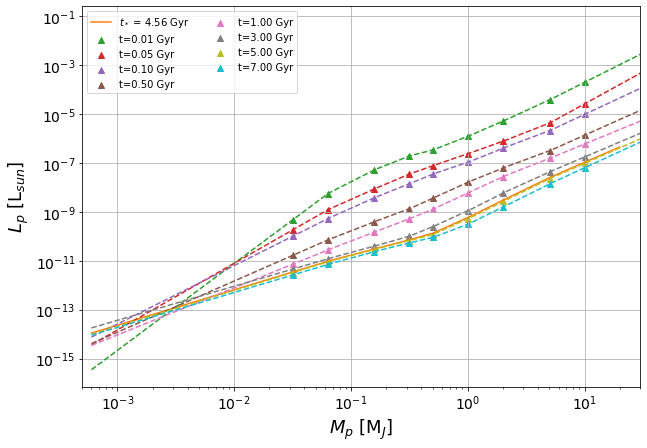

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('$M_p$ [M$_J$]',fontsize=18)
ax.set_ylabel('$L_p$ [L$_{sun}$]',fontsize=18)
ax.set_yscale('log')
ax.set_xscale("log")
ax.set_xlim(0.0005,30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.plot(mass_to_plot,Lum_Baraffe_noirrad,color='tab:orange',label='$t_*$ = 4.56 Gyr')
#ax.plot(mass_to_plot,Lum_Baraffe_irrad,color='tab:blue',label='Baraffe_irrad, +')
for age,color in zip(age_dict,color_dict) :
    #ax.plot(barraffe_irrad["M/M_E"]*ME/MJ,10**barraffe_irrad[age],linestyle='dotted', marker='+', label=age, color =color)
    f_noirrad = interp1d(np.log10(barraffe_noirrad["M/M_E"]),barraffe_noirrad[age],kind='linear',fill_value='extrapolate')
    ax.scatter(barraffe_noirrad["M/M_E"]*ME/MJ,10**barraffe_noirrad[age], marker='^', label=age[:6]+' Gyr', color =color)
    ax.plot(masses,10**f_noirrad(np.log10(masses*MJ/ME)), color =color, linestyle='dashed')
#ax.set_title('Mass-luminosity relation - Extrapolation for masses')
ax.legend(ncol=2)
plt.grid()
plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Lp_Mp.png',transparent=True, bbox_inches='tight', dpi=150 )
plt.show()

- ### Par rapport à l'âge pour chaque masse :

In [ ]:
ages = np.array([0.01,0.05,0.1,0.5,1.0,3.0,5.0,7.0])
mass_dict = np.array(barraffe_irrad['M/M_E']*ME/MJ,dtype=str)
mass_dict = np.array([mass_dict[i][:4] for i in range(len(mass_dict))])

barraffe_noirrad_mass = barraffe_noirrad.set_index('M/M_E')

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Age in [Gyr]')
ax.set_ylabel('Luminosity in [L$_{sun}$]')
ax.set_yscale('log')
ax.set_xscale("log")
ax.set_xlim(1e-2,1e2)
ax.plot(mass_to_plot,Lum_Baraffe_noirrad,color='tab:orange',label='Baraffe_noirrad, ^')
for i,color in enumerate(color_dict) :
    L=np.array(barraffe_noirrad_mass.iloc[i])
    f_noirrad = interp1d(np.log10(barraffe_noirrad["M/M_E"],),kind='linear',fill_value='extrapolate')
    ax.plot(barraffe_noirrad["M/M_E"]*ME/MJ,10**L,linestyle='dotted', marker='^', label=mass_dict[i], color =color)
    ax.plot(masses,10**f_noirrad(np.log10(masses*MJ/ME)), color =color)
ax.set_title('Mass-luminosity relation - Extrapolation for masses')
ax.legend(ncol=2)
plt.grid()
plt.show()

# Comparaison taille région dynamo et coeff de RC

In [ ]:
data_rcdyn_R1_noexp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rcdyn_R1_noexp.csv', delimiter=';') 
data_rcdyn_R1_exp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rcdyn_R1_exp.csv', delimiter=';') 
data_rcdyn_noexp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rcdyn_noexp.csv', delimiter=';') 
data_rcdyn_exp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rcdyn_exp.csv', delimiter=';') 

data_rccoeff_exp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rccoeff_exp.csv', delimiter=';') 
data_rccoeff_noexp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rccoeff_exp.csv', delimiter=';') 
data_rccoeff_R1_noexp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rccoeff_R1_noexp.csv', delimiter=';') 
data_rccoeff_R1_exp = pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/Test_RC/MvsMmag_rccoeff_R1_exp.csv', delimiter=';') 

In [ ]:
rcJ = 0.8487819514093978 #Rj
rcjup_calc = 0.8484297414500909 #en Rjcalc
rc_dyn_exp = data_rcdyn_exp['dynamo_radius']*rcJ ; Mmag_dyn_exp = data_rcdyn_exp['magnetic_moment']
rc_dyn_noexp = data_rcdyn_noexp['dynamo_radius']*rcjup_calc/(data_rcdyn_noexp['planet_radius']) ; Mmag_dyn_noexp = data_rcdyn_noexp['magnetic_moment']
rc_dyn_R1_exp = data_rcdyn_R1_exp['dynamo_radius']*rcJ ; Mmag_dyn_R1_exp = data_rcdyn_R1_exp['magnetic_moment']
rc_dyn_R1_noexp = data_rcdyn_R1_noexp['dynamo_radius']*rcJ/(data_rcdyn_R1_noexp['planet_radius']) ; Mmag_dyn_R1_noexp = data_rcdyn_R1_noexp['magnetic_moment']

rc_coeff_exp = data_rccoeff_exp['dynamo_radius']*0.83 ; Mmag_coeff_exp = data_rccoeff_exp['magnetic_moment']
rc_coeff_noexp = data_rccoeff_noexp['dynamo_radius']*0.83 ; Mmag_coeff_noexp = data_rccoeff_noexp['magnetic_moment']
rc_coeff_R1_exp = data_rccoeff_R1_exp['dynamo_radius']*0.83 ; Mmag_coeff_R1_exp = data_rccoeff_R1_exp['magnetic_moment']
rc_coeff_R1_noexp = data_rccoeff_R1_noexp['dynamo_radius']*0.83 ; Mmag_coeff_R1_noexp = data_rccoeff_R1_noexp['magnetic_moment']

In [ ]:
print('rc en Rp :', rcJ* 1.0138097809420443, 'pour R=-1')
print('rc en Rp :', rcJ* 1.0000446662180407, 'pour R=1')
print(coeff_rc[7123])

In [ ]:
plt.figure()
plt.plot(masses[rc_dyn_exp >0],data_rcdyn_exp['planet_radius'][rc_dyn_exp >0], label='Rp=-1.')
plt.xlabel('Masses [Mj]')
plt.ylabel('Radius[Rj]')
plt.grid()
plt.xscale('log')
plt.show()

In [ ]:
plt.figure()
plt.plot(masses[rc_dyn_exp >0],data_rcdyn_exp['planet_radius'][rc_dyn_exp >0], label='Rp=-1. , with expansion', color='tab:blue')
plt.plot(masses[rc_dyn_noexp >0],data_rcdyn_noexp['planet_radius'][rc_dyn_noexp >0], label='Rp=-1. , without expansion', color='tab:blue', linestyle='dashed')
plt.plot(masses[rc_dyn_R1_exp >0],data_rcdyn_R1_exp['planet_radius'][rc_dyn_R1_exp >0], label='Rp=1. , with expansion', color='tab:red')
plt.plot(masses[rc_dyn_R1_noexp >0],data_rcdyn_R1_noexp['planet_radius'][rc_dyn_R1_noexp >0], label='Rp=1. , without expansion', color='tab:red',linestyle='dashed')
plt.plot(masses, coeff_rc, label='Coeff in RC paper', color='tab:green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masses in Mj')
plt.ylabel('Rp en RJ')
plt.title('R(M)')
plt.ylim(bottom = 0.01)
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure()
#plt.plot(masses[rc_dyn_exp >0],rc_dyn_exp[rc_dyn_exp >0], label='Rp=-1. , with expansion', color='tab:blue')
plt.plot(masses[rc_dyn_noexp >0],rc_dyn_noexp[rc_dyn_noexp >0], label='Rp=-1. , without expansion', color='tab:blue', linestyle='dashed')
#plt.plot(masses[rc_dyn_R1_exp >0],rc_dyn_R1_exp[rc_dyn_R1_exp >0], label='Rp=1. , with expansion', color='tab:red')
plt.plot(masses[rc_dyn_R1_noexp >0],rc_dyn_R1_noexp[rc_dyn_R1_noexp >0], label='Rp=1. , without expansion', color='tab:red',linestyle='dashed')
plt.plot(masses, coeff_rc, label='Coeff in RC paper', color='tab:green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masses in Mj')
plt.ylabel('rc in Rp')
plt.title('rc(M)')
plt.ylim(bottom = 0.01)
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(masses[rc_dyn_exp >0], Mmag_dyn_exp[rc_dyn_exp>0], label ='Magnetic moment RC+, Rp=-1, with expansion')
plt.plot(masses[rc_dyn_R1_exp >0], Mmag_dyn_R1_exp[rc_dyn_R1_exp>0], label ='Magnetic moment RC+, Rp=1, with expansion')
plt.plot(masses[rc_coeff >0], Mmag_dyn_coeff[rc_coeff>0], label ='Magnetic moment RC, Rp=-1')
plt.plot(masses[rc_coeff_R1 >0], Mmag_dyn_coeff_R1[rc_coeff_R1 >0], label ='Magnetic moment RC, Rp=1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masses in Mj')
plt.ylabel('rc in Rp')
plt.title('Mmag(M) with R=-1')
plt.ylim(bottom = 0.01)
plt.grid()
plt.legend()
plt.show()

In [ ]:
def rho(r):
    MJ = 1.8986e27  # kg
    RJ = 69911e3  # m
    a = np.pi*MJ/(4*(RJ**3))
    b = np.pi*r/RJ
    return a * np.sin(b)/b

r = np.linspace(0,4 * 69911e3, 500)

plt.figure()
plt.plot(r/69911e3,rho(r))
plt.plot(r/69911e3,[700]*500)
plt.xlabel('Rayon en m')
plt.ylabel('Densité (kg/m3)')
plt.grid()
plt.show()

In [ ]:
from dynamo_region import LaneEmden, rhodyn

MJ = 1.8986e27  # kg
RJ = 69911e3  # m

rcjup = LaneEmden(MJ,RJ,700)
rhojup = rhodyn(MJ,RJ,rcjup)
print('rc(RJ) : ', rcjup/RJ, 'densite :',rhojup)

Mmax = 3.16 * 1.8986e27  # kg
rho0 = 394  # kg.m-3
RJ = 69911e3
RJ_calc = pow((4 / 3) * np.pi * rho0, -1.0 / 3) * pow(1 * 1.8986e27, 1.0 / 3)/ (1 + pow(1 * 1.8986e27 / Mmax, 2.0 / 3))

rcjup_calc = LaneEmden(MJ,RJ_calc,700)
rhojup_calc = rhodyn(MJ,RJ_calc,rcjup_calc)

print('RJ_calc:',RJ_calc)
print('Rc_estime/RcJ: ',rcjup_calc/RJ_calc)
print('Rho_estime/RhoJ: ',rhojup_calc/rhojup)

## Comparaison avec Lynch, 2018

In [ ]:
data =pd.read_csv(r'/Users/emauduit/Documents/These/Sélection des cibles/Programmes/exoplanet.eu_catalog_all.csv') 


,skiprows=105,names=['pl_name','star_name','default_flag','detection_type','disc_year', 'pl_refname','orbital_period','orbital_period_error_min', 
    'orbital_period_error_max', 'pl_orbperlim', 'semi_major_axis','semi_major_axis_error_min','semi_major_axis_error_max', 'pl_orbsmaxlim',
    'radius', 'radius_error_min', 'radius_error_max', 'radius_lim', 'mass','mass_error_min','mass_error_max','pl_bmassjlim', 'mass_sini',
    'mass_sini_error_min','mass_sini_error_max', 'pl_msinijlim','pl_bmassprov','eccentricity','eccentricity_error_min','eccentricity_error_max',
    'pl_orbeccenlim','inclination', 'inclination_error_min', 'inclination_error_max', 'inclination_error_lim', 'ttv_flag', 'pl_imppar', 
    'pl_impparerr1', 'pl_impparerr2', 'pl_impparlim', 'st_refname', 'star_sp_type', 'star_teff', 'star_teff_error_min', 'star_teff_error_max', 
    'st_tefflim', 'star_radius', 'star_radius_error_min', 'star_radius_error_max', 'star_radius_error_lim', 'star_mass', 'star_mass_error_min', 
    'star_mass_error_max', 'star_mass_error_lim', 'star_metallicity', 'star_metallicity_error_min', 'star_metallicity_error_max', 
    'star_metallicity_error_lim', 'st_metratio', 'st_lum', 'st_lumerr1', 'st_lumerr2', 'st_lumlim', 'st_logg', 'st_loggerr1', 'st_loggerr2', 
    'st_logglim', 'star_age', 'star_age_error_min', 'star_age_error_max', 'star_age_error_lim', 'st_vsin', 'st_vsinerr1', 'st_vsinerr2',
    'st_vsinlim', 'st_rotp', 'st_rotperr1', 'st_rotperr2', 'st_rotplim', 'sy_refname', 'rastr', 'ra', 'decstr', 'dec', 'star_distance', 
    'star_distance_error_min', 'star_distance_error_max', 'mag_v','sy_vmagerr1', 'sy_vmagerr2', 'mag_k', 'sy_kmagerr1', 'sy_kmagerr2', 
    'sy_gaiamag', 'sy_gaiamagerr1','sy_gaiamagerr2', 'rowupdate', 'pl_pubdate', 'releasedate'],header=0)

In [ ]:
data.keys()

In [ ]:
data1=data.reset_index()

In [ ]:
list_target=['BD+20 1790 b', 'GJ 876 b','HATS-24 b', 'HD 130322 b','HD 210702 b', 'HD 5891 b', 
    'HD 73256 b', 'OGLE2-TR-L9 b', 'Pr 0211 b', 'TAP 26 b', 'tau Boo A b', 'V830 Tau b', 'WASP-14 b',
    'WASP-140 b', 'WASP-167 b', 'WASP-18 b', 'WASP-43 b', 'WASP-77 A b']

In [ ]:
i = 0

for target in data1.itertuples():
    if target.Index in list_target :
        print(target.star_distance)

data_to_save=data1[data1['# name'].isin(list_target)]
data_to_save=data_to_save.set_index('# name')
data_to_save.to_csv(r'/Users/emauduit/Documents/Thèse/Sélection des cibles/Programmes/exoplanet.eu_catalog2.csv', sep=",")
data_to_save.keys()